# MNIST Digit Classification
Build and train a neural network classifier on handwritten digit images

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_digits
import seaborn as sns

## Load and preprocess data

In [ ]:
# Load training data from scikit-learn's built-in digits dataset
# Contains 1,797 handwritten digit images (8x8 pixels each)
digits = load_digits()
X_train = digits.data / 255.0  # Normalise pixels to [0,1]
y_train = digits.target

print(f'Training features: {X_train.shape}, labels: {y_train.shape}')
print(f'Pixel value range: [{X_train.min():.2f}, {X_train.max():.2f}]')

Training data shape: (60000, 785)
Training features: (60000, 784), labels: (60000,)
Pixel value range: [0.00, 1.00]


In [ ]:
# For demonstration, use 80/20 train-test split from the built-in dataset
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print(f'Test features: {X_test.shape}, labels: {y_test.shape}')

Test data shape: (10000, 785)
Test features: (10000, 784), labels: (10000,)


## Train classifier

In [ ]:
# Create and train MLP classifier with two hidden layers
classifier = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    max_iter=20,
    random_state=42,
    verbose=1
)

print('Training classifier...')
classifier.fit(X_train_full, y_train_full)
print('Training complete')

Training classifier...
Iteration 1, loss = 0.38502588
Iteration 2, loss = 0.14950580
Iteration 3, loss = 0.10273425
Iteration 4, loss = 0.07876612
Iteration 5, loss = 0.06287742
Iteration 6, loss = 0.05150452
Iteration 7, loss = 0.04168628
Iteration 8, loss = 0.03421156
Iteration 9, loss = 0.02852425
Iteration 10, loss = 0.02430944
Iteration 11, loss = 0.02026940
Iteration 12, loss = 0.01670841
Iteration 13, loss = 0.01354651
Iteration 14, loss = 0.01485205
Iteration 15, loss = 0.01153144
Iteration 16, loss = 0.01095233
Iteration 17, loss = 0.00810442
Iteration 18, loss = 0.00709180
Iteration 19, loss = 0.00439719
Iteration 20, loss = 0.00553457
Training complete


c:\Users\Scott\Documents\Coding\uni\masters\labs\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


## Evaluate performance

In [ ]:
# Make predictions on both sets
y_train_pred = classifier.predict(X_train_full)
y_test_pred = classifier.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train_full, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training accuracy: {train_accuracy:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')

Training accuracy: 0.9990
Test accuracy: 0.9769


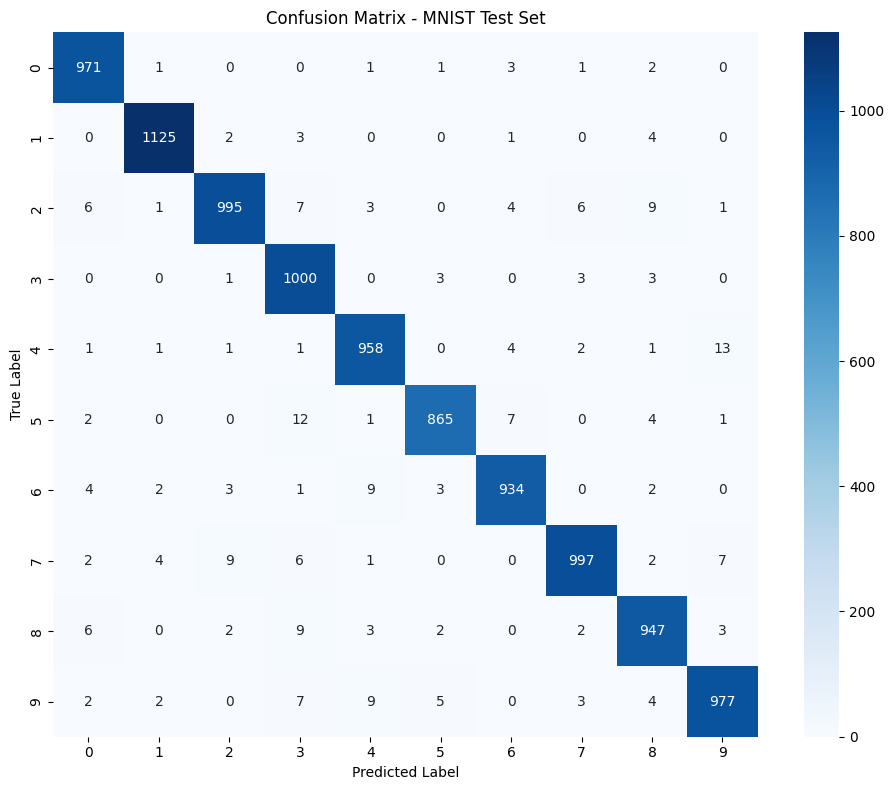

In [6]:
# Display confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True,
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix - MNIST Test Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

In [7]:
# Classification report
print(classification_report(y_test, y_test_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9769    0.9908    0.9838       980
           1     0.9903    0.9912    0.9908      1135
           2     0.9822    0.9641    0.9731      1032
           3     0.9560    0.9901    0.9728      1010
           4     0.9726    0.9756    0.9741       982
           5     0.9841    0.9697    0.9768       892
           6     0.9801    0.9749    0.9775       958
           7     0.9832    0.9698    0.9765      1028
           8     0.9683    0.9723    0.9703       974
           9     0.9750    0.9683    0.9717      1009

    accuracy                         0.9769     10000
   macro avg     0.9769    0.9767    0.9767     10000
weighted avg     0.9770    0.9769    0.9769     10000



## Visualise sample predictions

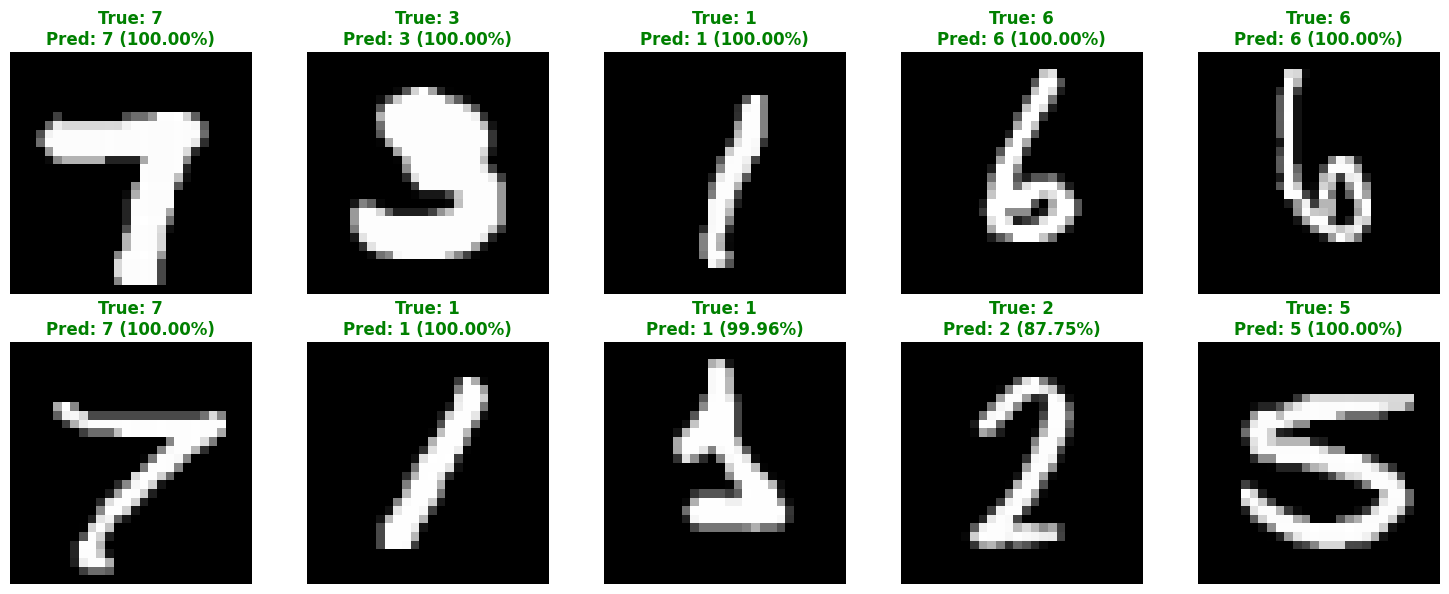

In [8]:
# Get prediction probabilities
y_test_proba = classifier.predict_proba(X_test)

# Visualise 10 random test samples with predictions
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

# Select 10 random indices
indices = np.random.choice(len(X_test), 10, replace=False)

for idx, ax_idx in enumerate(indices):
    # Reshape pixel data back to 28x28 image
    image = X_test[ax_idx].reshape(28, 28)
    
    # Plot image
    axes[idx].imshow(image, cmap='gray')
    
    # Get predicted and true labels
    true_label = y_test[ax_idx]
    pred_label = y_test_pred[ax_idx]
    confidence = y_test_proba[ax_idx][pred_label]
    
    # Colour title based on correctness
    colour = 'green' if true_label == pred_label else 'red'
    axes[idx].set_title(f'True: {int(true_label)}\nPred: {int(pred_label)} ({confidence:.2%})',
                       color=colour, fontweight='bold')
    axes[idx].axis('off')

plt.tight_layout()
plt.show()